<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter8/VarImportance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.13


# Example 8.5
## Import modules

In [2]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt, pylab
from sklearn import linear_model
print(np.__version__)

1.21.5


## Set random seed

In [3]:
np.random.seed(100)

## Original Program

Feature 5 (0.284586)
Feature 1 (0.225409)
Feature 2 (0.100885)
Feature 4 (0.091875)
Feature 3 (0.083447)
Feature 7 (0.023697)
Feature 11 (0.023680)
Feature 15 (0.022142)
Feature 8 (0.021821)
Feature 13 (0.021715)
Feature 9 (0.021553)
Feature 6 (0.020364)
Feature 12 (0.019789)
Feature 14 (0.019611)
Feature 10 (0.019425)


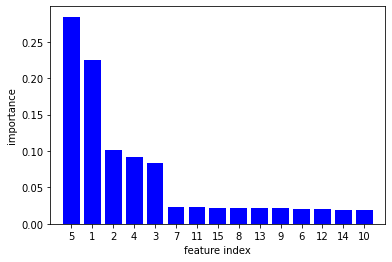

In [4]:
# create regression problem
n_points = 1000 # points
x, y =  make_classification(n_samples=n_points, n_features=15, n_informative=5,
                            n_redundant=0, n_repeated=0, random_state=100, shuffle=False)

rf = RandomForestClassifier(n_estimators=200, max_features  = "log2")

rf.fit(x,y)


importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(15):
    print("Feature %d (%f)" % (indices[f]+1, importances[indices[f]]))


std = np.std([rf.feature_importances_ for tree in rf.estimators_],
             axis=0)

# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
f = plt.figure()
#plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices+1)
plt.xlim([-1, x.shape[1]])
pylab.xlabel("feature index")
pylab.ylabel("importance")
plt.show()
f.savefig("varimport.pdf", bbox_inches='tight')
# %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

## Check features

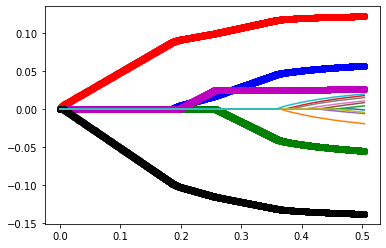

In [10]:
Ng = 5000
gg = np.linspace(-4, 2, num=Ng)
gg = np.power(10,gg)
p_est = np.zeros((Ng, 15))
p_true = 5
for i in range(Ng):
  clf_L = linear_model.Lasso(gg[i])
  clf_L.fit(x,y)
  p_est[i] = clf_L.coef_

pnorm = np.linalg.norm(p_est, axis=1, ord=1)

col = ['r','b','g','m','k']
for i in range(5):
    plt.plot(pnorm, p_est.T[i], 'o', color=col[i])

for i in range(5, 15):
    plt.plot(pnorm, p_est.T[i], '-')

#plt.xscale('log')
plt.show()

